# Prediction of Real Estate Housing Prices in USA using kNN-Regressor and Linear Regression Model Estimators
Kaggle Dataset

Your neighbor is a real estate agent and wants some help predicting housing prices for regions in the USA. It would be great if you could somehow create a model for her that allows her to put in a few features of a house and returns back an estimate of what the house would sell for.

She has asked you if you could help her out with your new data science skills. You say yes, and decide that Linear Regression might be a good path to solve this problem!

The data contains the following columns:

* 'Avg. Area Income': Avg. Income of residents of the city house is located in.
* 'Avg. Area House Age': Avg Age of Houses in same city
* 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
* 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
* 'Area Population': Population of city house is located in
* 'Price': Price that the house sold at
* 'Address': Address for the house

##### NOTE: kNN-Regressor and Linear Regression here are from my own library but alternatives are sklearn.neighbors.KNeighborsRegressor and sklearn.linear_model.LinearRegression

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
USAhousing = pd.read_csv('USA_Housing.csv')
print(USAhousing.columns)
#Address without maps and other associated relevant information may not be that useful although zip-code may be extracted
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population']]
Y = USAhousing['Price']

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')


In [13]:
USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


<AxesSubplot:>

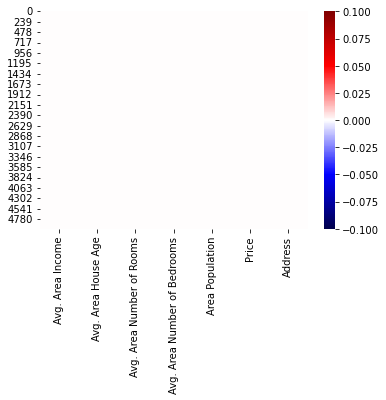

In [14]:
sns.heatmap(USAhousing.isnull(),cmap='seismic')
#No Null values as such

<AxesSubplot:>

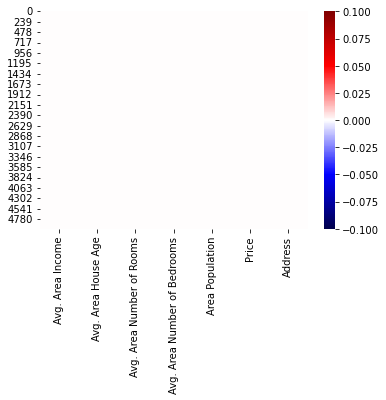

In [15]:
sns.heatmap(USAhousing.isna(),cmap='seismic')
#No Nan values present

# Modeling the Data

In [16]:
exec(open("linear_reg.py").read())

USAhousing = pd.read_csv('USA_Housing.csv')
print(USAhousing.columns)
#Address without maps and other associated relevant information may not be that useful although zip-code may be extracted in the future
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population']]
Y = USAhousing['Price']

X=X.to_numpy();
Y=Y.to_numpy();

#12th project on ECommerce Investment Problem 
#####
#customers = pd.read_csv('Ecommerce Customers');
#X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']];
#Y = customers['Yearly Amount Spent'];

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')


X_train size =  (4000, 4)
weights 
 [[0.07645321]
 [0.23360259]
 [0.75347739]
 [0.06210008]]
bias 
 [0.08570059]


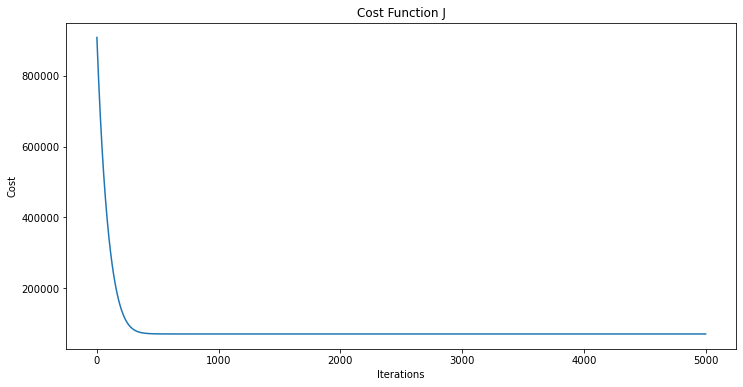

Regression Error Estimate Metrics


MAE = 389132640.1787964
MSE = 239313994498363.94
RMSE = 15469776.808291836
Error Estimate Metrics
MAE =  389132640.1787964
MSE =  239313994498363.94
RMSE =  15469776.808291836
[[228670.7312564 ]
 [163986.39719502]
 [122480.66481485]
 [152174.34159335]]
[1233927.36231983]


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2);
print('X_train size = ',np.shape(X_train))

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler();
X_train = scaler.fit_transform(X_train);
l = 10**(-2);
noit = 5000;#num of iterations
reg=10**(-3)
w, b = linear_reg(X_train,Y_train,l,noit);#linear regression 
X_test = scaler.transform(X_test);
y_pred = predict(X_test,w,b);

MAE, MSE, RMSE = model_metrics(Y_test,y_pred);

print('Error Estimate Metrics')
print('MAE = ',MAE)
print('MSE = ',MSE)
print('RMSE = ',RMSE)

print(w)
print(b)

C:\Users\500030674\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


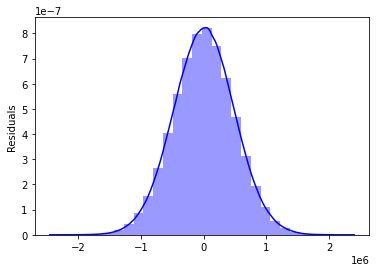

In [18]:
#Residual model
sns.distplot(y_pred-Y_test, color='blue', bins=30)
plt.ylabel('Residuals')
plt.show()

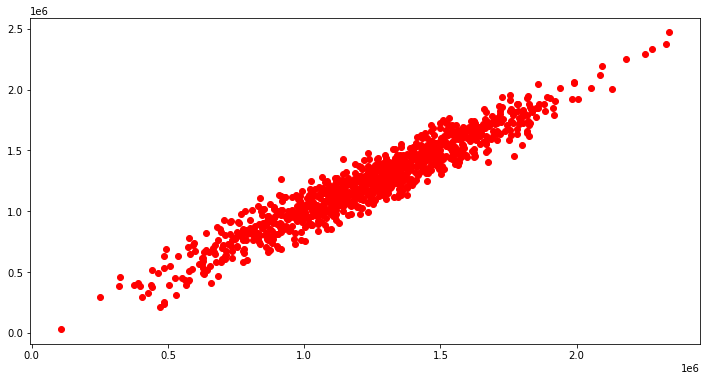

In [19]:
# Line of fit
#sns.scatterplot(X_test[0:,2], Y_test)
plt.figure(figsize=(12,6))
plt.plot((y_pred), np.array(Y_test).reshape([1000,1]),'or')
#plt.plot(X_test[0:,2], y_pred, color='red')
plt.show()

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

exec(open("linear_reg_L2_reg.py").read())

USAhousing = pd.read_csv('USA_Housing.csv')
print(USAhousing.columns)
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population']]
Y = USAhousing['Price']

X=X.to_numpy();
Y=Y.to_numpy();

#12th project on ECommerce Investment Problem 
#####
#customers = pd.read_csv('Ecommerce Customers');
#X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']];
#Y = customers['Yearly Amount Spent'];

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')


X_train size =  (4000, 4)
weights 
 [[-0.75942658]
 [ 0.56511735]
 [ 0.43020454]
 [ 0.63621587]]
bias 
 [0.31820847]


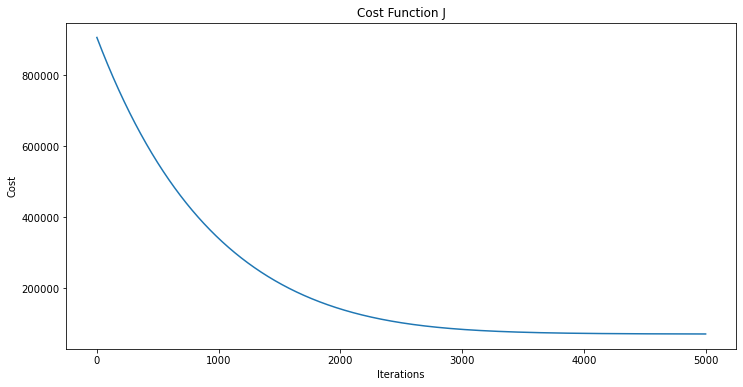

Regression Error Estimate Metrics


MAE = 402861966.82882434
MSE = 254328086491924.84
RMSE = 15947667.117541827
Error Estimate Metrics
MAE =  402861966.82882434
MSE =  254328086491924.84
RMSE =  15947667.117541827
[[226592.55642098]
 [163422.07885994]
 [122060.77946252]
 [149505.73831497]]
[1223679.63517599]


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2);
print('X_train size = ',np.shape(X_train))

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler();
X_train = scaler.fit_transform(X_train);
l = 10**(-3);
noit = 5000;
reg=10**(-5)
w, b = linear_reg_L2_reg(X_train,Y_train,l,noit,reg);
X_test = scaler.fit_transform(X_test);
y_pred = predict(X_test,w,b);

MAE, MSE, RMSE = model_metrics(Y_test,y_pred);

print('Error Estimate Metrics')
print('MAE = ',MAE)#np.sum((np.abs(y_test-y_pred))/len(y_test));
print('MSE = ',MSE)
print('RMSE = ',RMSE)

print(w)
print(b)

# KNN Regressor

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2);
print('X_train size = ',np.shape(X_train))

X_train size =  (4000, 4)


In [23]:
exec(open("knn_regressor.py").read())
p=2;#Norm for Similarity Metric
k=2000;
y_pred_knn = knn_regressor(X_train,Y_train,X_test,Y_test,p,k);
MAE_knn, MSE_knn, RMSE_knn = model_metrics(Y_test,y_pred_knn);

In [41]:
r = 1000;
MAE_knn = np.zeros([r,1]);
MSE_knn = np.zeros([r,1]);
RMSE_knn = np.zeros([r,1]);
for k in range(1,r):
    y_pred_knn = knn_regressor(X_train,Y_train,X_test,Y_test,p,k);
    MAE_knn[k-1], MSE_knn[k-1], RMSE_knn[k-1] = model_metrics(Y_test,y_pred_knn);

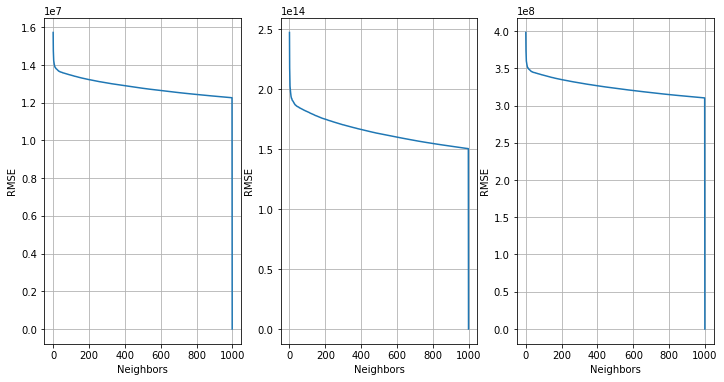

In [42]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.plot(range(0,r),RMSE_knn)
plt.xlabel('Neighbors')
plt.ylabel('RMSE')
plt.grid()
plt.subplot(1,3,2)
plt.plot(range(0,r),MSE_knn)
plt.xlabel('Neighbors')
plt.ylabel('RMSE')
plt.grid()
plt.subplot(1,3,3)
plt.plot(range(0,r),MAE_knn)
plt.xlabel('Neighbors')
plt.ylabel('RMSE')
plt.grid()
#Zooming i would help

(0.0, 30.0)

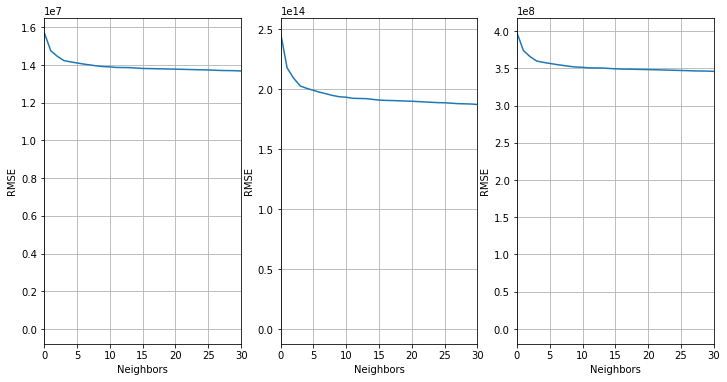

In [43]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.plot(range(0,r),RMSE_knn)
plt.xlabel('Neighbors')
plt.ylabel('RMSE')
plt.grid()
plt.xlim([0, 30])
plt.subplot(1,3,2)
plt.plot(range(0,r),MSE_knn)
plt.xlabel('Neighbors')
plt.ylabel('RMSE')
plt.grid()
plt.xlim([0, 30])
plt.subplot(1,3,3)
plt.plot(range(0,r),MAE_knn)
plt.xlabel('Neighbors')
plt.ylabel('RMSE')
plt.grid()
plt.xlim([0, 30])
#Zooming i would help

In [44]:
p = 2;
k_opt = 10;#from RMSE curve
y_pred_knn = knn_regressor(X_train,Y_train,X_test,Y_test,p,k_opt);

In [50]:
MAE_knn[k_opt]
MAE

402861966.82882434

In [55]:
MAE_knn[k_opt], MSE_knn[k_opt], RMSE_knn[k_opt]
MAE, MSE, RMSE
print('percentage Mean Absolute Error Difference')
print((MAE_knn[k_opt]-MAE)*100/(MAE))
print('percentage ean Squared Error Difference')
print((MSE_knn[k_opt]-MSE)*100/(MSE))
print('percentage Root Mean Squared Error Difference')
print((RMSE_knn[k_opt]-RMSE)*100/RMSE)

percentage Mean Absolute Error Difference
[-12.79595507]
percentage ean Squared Error Difference
[-23.94217083]
percentage Root Mean Squared Error Difference
[-12.78886013]
